In [2]:
import sys
import os

import matplotlib.pyplot as plt

# Meus scripts
sys.path.append(os.path.abspath('../Scripts'))
import data_processing_WAGGS
import starlight_analysis_WAGGS as sl_analysis

In [13]:
files = {
    "U" : "../../Dados/WAGGS_DR1/norm_NGC0104_U7000_2015-01-30.fits",
    "B" : "../../Dados/WAGGS_DR1/norm_NGC0104_B7000_2015-01-30.fits",
    "R" : "../../Dados/WAGGS_DR1/norm_NGC0104_R7000_2015-01-30.fits",
    "I" : "../../Dados/WAGGS_DR1/norm_NGC0104_I7000_2015-01-30.fits"
}

l_ambda, fluxo, erro = data_processing_WAGGS.processar_espectros(files, lambda_min=3450, lambda_max=9050, step=1.0,
                                                                 output_name="NGC0104.in", err_sistematico=0.05)

# Verifica header de um dos arquivos
#fits_file = fits.open("../../Dados/WAGGS_DR1/norm_NGC0104_U7000_2015-01-30.fits")
#print(fits_file[0].header)
#print(fits_file.info())

Arquivo gerado: NGC0104.in


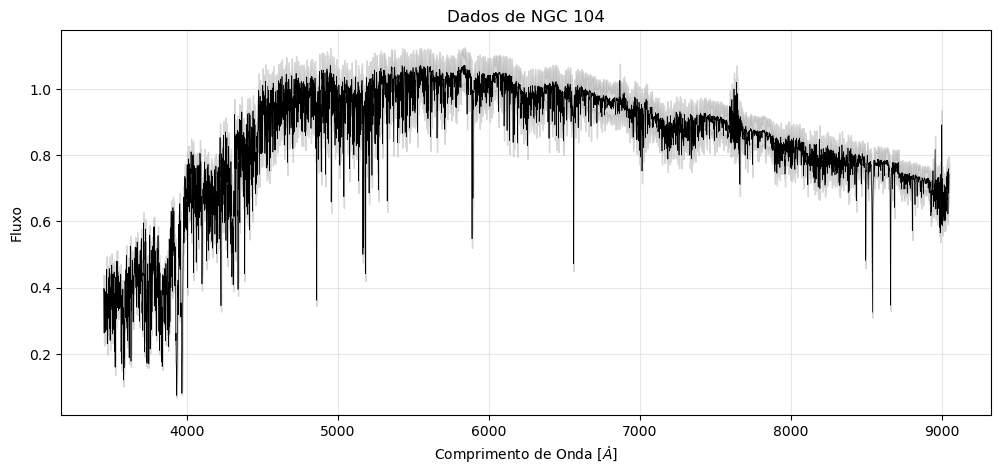

In [7]:
plt.figure(figsize=(12,5))
plt.plot(l_ambda, fluxo, color='black', lw=0.5, label='Espectro NGC 104')
plt.fill_between(l_ambda, fluxo - erro, fluxo + erro, color='gray', alpha=0.3, label='Erro')
plt.title("Dados de NGC 104")
plt.xlabel("Comprimento de Onda [$\\mathring{A}$]")
plt.ylabel("Fluxo")
plt.grid(True, alpha=0.3)
plt.show()

Idade (LUZ):   5.88 Bilhões de Anos
Idade (MASSA): 8.64 Bilhões de Anos
Metalicidade: 0.0191

Qualidade:
Chi2/N_eff: 1.00528
Desvio Médio (Adev): 4.22665%
Extinção (Av): -0.181 mag
Percentual de pontos clipados: 3.52%


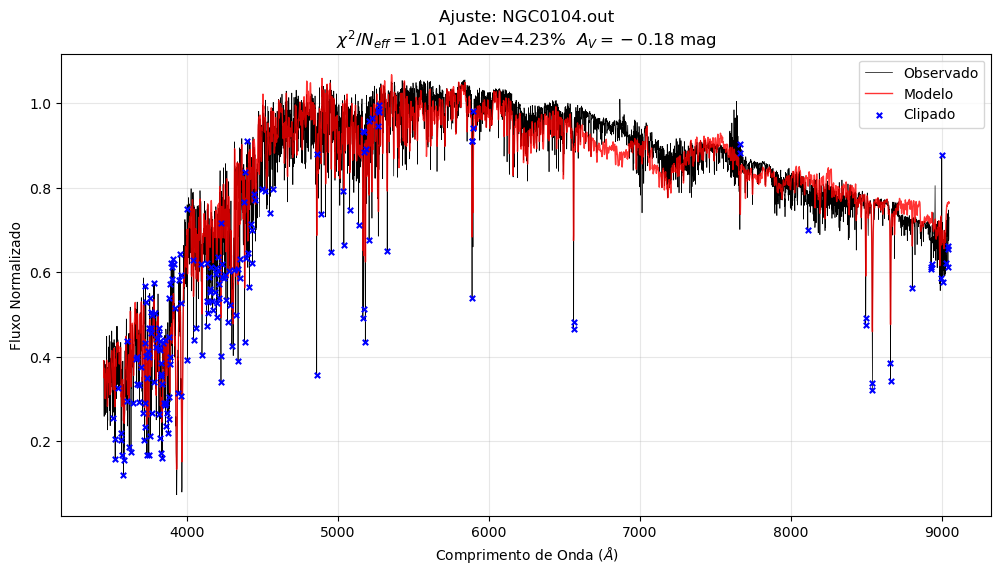

In [15]:
out_file_path = "NGC0104.out"

sl_obj = sl_analysis.StarlightOutput(out_file_path)

props = sl_obj.calculate_mean_properties()

if props:
     print(f"Idade (LUZ):   {props['mean_age_light_gyr']:.2f} Bilhões de Anos")
     print(f"Idade (MASSA): {props['mean_age_mass_gyr']:.2f} Bilhões de Anos")
     print(f"Metalicidade: {props['mean_Z_mass']:.4f}")

     print("\nQualidade:")
     print(f"Chi2/N_eff: {sl_obj.chi2}")
     print(f"Desvio Médio (Adev): {sl_obj.adev}%")
     print(f"Extinção (Av): {sl_obj.av} mag")
     print(f"Percentual de pontos clipados: {(sl_obj.nclip / sl_obj.n0) * 100:.2f}%")

sl_obj.plot_fit()